In [1]:
import numpy as np
import h5py
filepath='./wlan_train_set_joint_v3.mat'
f=h5py.File(filepath,'r')
train_data=np.array(f['Train_data'][:])
time_label=np.array(f['Train_timing_label_onehot'][:])
cfo_label=np.array(f['Train_cfo_label'][:])/1e3



Using TensorFlow backend.



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 11, 864, 1)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 11, 864, 32)  1600        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 6, 432, 32)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 6, 432, 64)   100416      max_pooling2d_1[0][0]            
___________________________________________________________________________________________

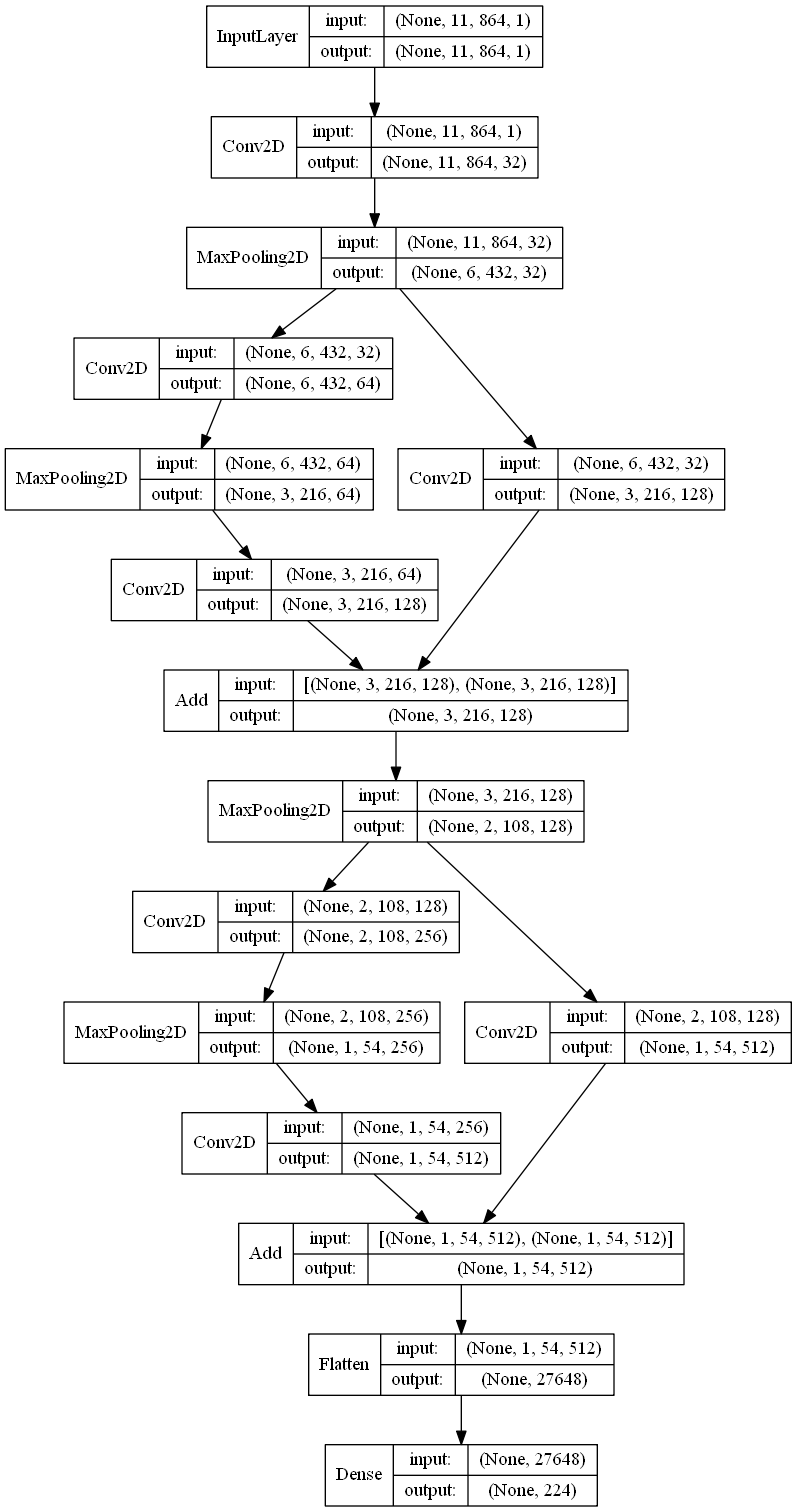

In [2]:
from keras.models import Model
from keras import models
from keras import layers
from keras import Input
from keras import optimizers
from keras.layers import Dropout
from keras.layers import BatchNormalization
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model

input_data=Input(shape=(11,864,1))
x=layers.Conv2D(32,(1,49),padding='same',activation='relu',kernel_initializer='he_normal')(input_data)
x=layers.MaxPooling2D((2,2),padding='same')(x)

x_skip1=layers.Conv2D(128,(1,1),strides=(2,2),padding='same',activation='relu',kernel_initializer='he_normal')(x)

x=layers.Conv2D(64,(1,49),padding='same',activation='relu',kernel_initializer='he_normal')(x)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(128,(1,49),padding='same',activation='relu',kernel_initializer='he_normal')(x)
x=layers.add([x_skip1,x])

x=layers.MaxPooling2D((2,2),padding='same')(x)

x_skip2=layers.Conv2D(512,(1,1),strides=(2,2),padding='same',activation='relu',kernel_initializer='he_normal')(x)

x=layers.Conv2D(256,(1,49),padding='same',activation='relu',kernel_initializer='he_normal')(x)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(512,(1,49),padding='same',activation='relu',kernel_initializer='he_normal')(x)

x=layers.add([x_skip2,x])

#x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Flatten()(x)
x=layers.Dense(224,activation='softmax',name='timing')(x)


model= Model(input_data,x)

model.summary()
plot_model(model,to_file='network.png',show_shapes=True,show_layer_names=False)

In [3]:
model.compile(optimizer=optimizers.Adam(lr=0.001),
                loss={'timing':'categorical_crossentropy'},
                loss_weights={'timing':1},
                metrics={'timing':'accuracy'})
model.fit(train_data,{'timing':time_label},epochs=10,batch_size=50)


Epoch 1/10
100000/100000 [==============================] - 114s 1ms/step - loss: 0.2705 - accuracy: 0.9378
Epoch 2/10
100000/100000 [==============================] - 116s 1ms/step - loss: 0.0291 - accuracy: 0.9922
Epoch 3/10
100000/100000 [==============================] - 113s 1ms/step - loss: 0.0209 - accuracy: 0.9944
Epoch 4/10
100000/100000 [==============================] - 114s 1ms/step - loss: 0.0144 - accuracy: 0.9960
Epoch 5/10
100000/100000 [==============================] - 113s 1ms/step - loss: 0.0120 - accuracy: 0.9968
Epoch 6/10
100000/100000 [==============================] - 115s 1ms/step - loss: 0.0083 - accuracy: 0.9976
Epoch 7/10
100000/100000 [==============================] - 113s 1ms/step - loss: 0.0072 - accuracy: 0.9979
Epoch 8/10
100000/100000 [==============================] - 113s 1ms/step - loss: 0.0052 - accuracy: 0.9986
Epoch 9/10
100000/100000 [==============================] - 112s 1ms/step - loss: 0.0048 - accuracy: 0.9987
Epoch 10/10
100000/100000 [

In [4]:
SNR=range(-15,19)
FER=[]
for SNR_loop in SNR:
    filepath='./wlan_test_set_joint_SNR(%d)_v3.mat' % SNR_loop
    f=h5py.File(filepath,'r')
    test_data=np.array(f['Test_data'][:])
    test_time_label=np.array(f['Test_timing_label_onehot'][:])
    test_cfo_label=np.array(f['Test_cfo_label'][:])/1e3
    a=model.evaluate(test_data, [test_time_label],batch_size=500)
    FER.append(a[1])
    print(a[1])

10000/10000 [==============================] - 2s 248us/step
0.15950000286102295
10000/10000 [==============================] - 2s 186us/step
0.2791000008583069
10000/10000 [==============================] - 2s 187us/step
0.4404999911785126
10000/10000 [==============================] - 2s 186us/step
0.6133999824523926
10000/10000 [==============================] - 2s 186us/step
0.7702000141143799
10000/10000 [==============================] - 2s 184us/step
0.8763999938964844
10000/10000 [==============================] - 2s 185us/step
0.935699999332428
10000/10000 [==============================] - 2s 184us/step
0.9681000113487244
10000/10000 [==============================] - 2s 186us/step
0.9837999939918518
10000/10000 [==============================] - 2s 186us/step
0.9923999905586243
10000/10000 [==============================] - 2s 184us/step
0.9965000152587891
10000/10000 [==============================] - 2s 186us/step
0.9990000128746033
10000/10000 [===========================

In [5]:
 FER

[0.15950000286102295,
 0.2791000008583069,
 0.4404999911785126,
 0.6133999824523926,
 0.7702000141143799,
 0.8763999938964844,
 0.935699999332428,
 0.9681000113487244,
 0.9837999939918518,
 0.9923999905586243,
 0.9965000152587891,
 0.9990000128746033,
 0.9994000196456909,
 0.9997000098228455,
 0.9998999834060669,
 1.0,
 1.0,
 0.9998999834060669,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]